#1 Load Data
Loading the train.csv for training and test.csv for predictions.

Checking for missing values and handling them appropriately.

Converting categorical features into numerical representations where necessary and the likes.

In [ ]:
#import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
# Load datasets and Displaying the first few rows
train_df = pd.read_csv('/content/Copy of train.csv')
test_df = pd.read_csv('/content/Copy of test.csv')
train_df.head()

,title,country,genres,language,writer_count,title_adaption,censor_rating,release_date,runtime,dvd_release_date,...,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination,revenue_category
0,Pooh's Heffalump Movie,USA,"Animation, Comedy, Family, Fantasy, Musical, M...",English,3.0,True,G,11-Feb-05,68 min,24-May-05,...,NaN,NaN,NaN,6.4/10,80%,64/100,0,0,1,High
1,Yeh Jawaani Hai Deewani,India,"Comedy, Drama, Musical, Romance","Hindi, English, French",2.0,True,Not Rated,31-May-13,160 min,15-Jul-13,...,124.0,127528.0,12.0,7.1/10,67%,0,0,22,92,Low
2,Tae Guk Gi: The Brotherhood of War,South Korea,"Action, Drama, War",Korean,4.0,False,R,24-Sep-04,140 min,15-Feb-05,...,614.0,351123.0,18.0,8.1/10,80%,64/100,0,12,7,Low
3,"Book of Eli, The",USA,"Action, Adventure, Drama, Thriller",English,1.0,False,R,15-Jan-10,118 min,15-Jun-10,...,NaN,NaN,NaN,6.9/10,47%,53/100,0,3,16,High
4,Blind Dating,USA,"Comedy, Romance",English,1.0,False,PG-13,26-Apr-07,95 min,05-Feb-08,...,693.0,970306.0,36.0,6.1/10,25%,0,0,0,0,Low


In [154]:
test_df.head()

,title,country,genres,language,writer_count,title_adaption,censor_rating,release_date,runtime,dvd_release_date,...,comments,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination
0,Delhi-6,India,"Comedy, Drama","Hindi, English",3.0,True,Not Rated,20-Feb-09,141 min,16-Jun-09,...,7.0,43.0,165008.0,13.0,6.0/10,40%,45/100,0,2,7
1,Before I Disappear,"USA, UK",Drama,English,1.0,False,Unrated,28-Nov-14,93 min,19-May-15,...,NaN,NaN,NaN,NaN,7.2/10,38%,47/100,0,16,8
2,"Good Year, A","USA, UK","Comedy, Drama, Romance","English, French, Russian",2.0,True,PG-13,10-Nov-06,117 min,27-Feb-07,...,14.0,276.0,187788.0,17.0,7.0/10,25%,47/100,0,1,2
3,Brüno,"USA, UK",Comedy,"English, German",9.0,True,R,10-Jul-09,81 min,17-Nov-09,...,81.0,301.0,200324.0,43.0,5.8/10,67%,54/100,0,2,5
4,How to Lose a Guy in 10 Days,"USA, Germany","Comedy, Romance",English,5.0,True,PG-13,07-Feb-03,116 min,01-Jul-03,...,74.0,480.0,740345.0,23.0,6.4/10,42%,45/100,0,1,8


In [155]:
#Checking for general information of the training data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               2398 non-null   object 
 1   country             2400 non-null   object 
 2   genres              2400 non-null   object 
 3   language            2395 non-null   object 
 4   writer_count        2306 non-null   float64
 5   title_adaption      2400 non-null   bool   
 6   censor_rating       2362 non-null   object 
 7   release_date        2396 non-null   object 
 8   runtime             2400 non-null   object 
 9   dvd_release_date    2331 non-null   object 
 10  users_votes         2400 non-null   object 
 11  comments            1974 non-null   float64
 12  likes               1956 non-null   float64
 13  overall_views       2083 non-null   float64
 14  dislikes            1956 non-null   float64
 15  ratings_imdb        2400 non-null   object 
 16  rating

this provides a summary of a DataFrame, showing:
Number of Entries  Total rows and index range.

Column Details  Names, count of non-null values, and data types ( object, int, float, bool).

Memory Usage The amount of memory the DataFrame consumes.

It is quickly used to understand data completeness, structure, and potential missing values.

In [177]:
#Checking for general information of the testing data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               600 non-null    object 
 1   country             600 non-null    object 
 2   genres              600 non-null    object 
 3   language            600 non-null    object 
 4   writer_count        571 non-null    float64
 5   title_adaption      600 non-null    bool   
 6   censor_rating       584 non-null    object 
 7   release_date        598 non-null    object 
 8   runtime             600 non-null    object 
 9   dvd_release_date    582 non-null    object 
 10  users_votes         600 non-null    object 
 11  comments            476 non-null    float64
 12  likes               477 non-null    float64
 13  overall_views       507 non-null    float64
 14  dislikes            477 non-null    float64
 15  ratings_imdb        600 non-null    object 
 16  ratings_

In [157]:
# Check for missing values
print(train_df.isnull().sum())

title                   2
country                 0
genres                  0
language                5
writer_count           94
title_adaption          0
censor_rating          38
release_date            4
runtime                 0
dvd_release_date       69
users_votes             0
comments              426
likes                 444
overall_views         317
dislikes              444
ratings_imdb            0
ratings_tomatoes        0
ratings_metacritic      0
special_award           0
awards_win              0
awards_nomination       0
revenue_category        0
dtype: int64


This shows the count of missing values in each column of the train_df DataFrame. It helps identify which columns have incomplete data, allowing for decisions on handling missing values( filling, dropping, or imputing them)

In [158]:
# Summary of numerical features
train_df.describe()

,writer_count,comments,likes,overall_views,dislikes,special_award,awards_win,awards_nomination
count,2306.000000,1974.000000,1956.000000,2.083000e+03,1956.000000,2400.000000,2400.000000,2400.000000
mean,2.596271,546.438197,3113.894172,1.345472e+06,232.665644,0.185417,6.582917,12.698333
std,2.011586,2103.833164,10213.600411,4.030918e+06,946.288417,0.388716,16.089857,24.925965
min,1.000000,0.000000,0.000000,2.100000e+01,0.000000,0.000000,0.000000,0.000000
25%,1.000000,10.000000,99.000000,6.752950e+04,7.000000,0.000000,0.000000,1.000000
50%,2.000000,57.000000,425.000000,2.816520e+05,30.000000,0.000000,2.000000,5.000000
75%,3.000000,289.000000,1819.000000,9.855095e+05,121.250000,0.000000,6.000000,12.000000
max,28.000000,44644.000000,188526.000000,1.071502e+08,29267.000000,1.000000,235.000000,326.000000


In [159]:
# Summary of categorical features
train_df.describe(include="object")


,title,country,genres,language,censor_rating,release_date,runtime,dvd_release_date,users_votes,ratings_imdb,ratings_tomatoes,ratings_metacritic,revenue_category
count,2398,2400,2400,2395,2362,2396,2400,2331,2400,2400,2400,2400,2400
unique,2387,485,586,474,8,1216,116,898,2361,69,102,94,2
top,"Last Kiss, The",USA,Drama,English,R,27-Apr-12,90 min,12-Jan-10,"2,926",6.6/10,85%,0,High
freq,2,1185,147,1313,971,8,92,10,2,117,50,114,1221


####Summary Statistics

In [160]:
# For categorical columns
categorical_cols = train_df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"Categorical Column: {col}")
    print(train_df[col].value_counts())
    print("=" * 50)

# For numerical columns
numerical_cols = train_df.select_dtypes(include=["number"]).columns
for col in numerical_cols:
    print(f"Numerical Column: {col} (Unique Values: {train_df[col].nunique()})")
    print("-" * 50)


Categorical Column: title
title
Last Kiss, The            2
Double, The               2
Gabrielle                 2
Road, The                 2
Metropolis                2
                         ..
Valentine's Day           1
Mr. Brooks                1
Happening, The            1
Catch and Release         1
Because of Winn-Dixie     1
Name: count, Length: 2387, dtype: int64
Categorical Column: country
country
USA                                  1185
France                                 62
UK                                     62
USA, Germany                           54
UK, USA                                52
                                     ... 
USA, Hungary, Italy                     1
USA, Lithuania                          1
USA, UK, Russia                         1
UK, France, Italy, Belgium, Spain       1
Spain, Mexico, France                   1
Name: count, Length: 485, dtype: int64
Categorical Column: genres
genres
Drama                                       147
C

#2. Data Cleaning

In [161]:
# Fill missing categorical values with the mode
categorical_cols = ["language", "censor_rating", "title"]
for col in categorical_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

# Fill missing numerical values with the median
numerical_cols = ["writer_count", "comments", "likes", "overall_views", "dislikes"]
for col in numerical_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())

# Fill missing release_date and dvd_release_date with most frequent year
train_df["release_date"] = pd.to_datetime(train_df["release_date"])
train_df["dvd_release_date"] = pd.to_datetime(train_df["dvd_release_date"])

# Convert most_frequent_year to an integer before using it in pd.Timestamp
most_frequent_year = int(train_df["release_date"].dt.year.mode()[0])
train_df["release_date"] = train_df["release_date"].fillna(pd.Timestamp(f"{most_frequent_year}-01-01"))

most_frequent_dvd_year = int(train_df["dvd_release_date"].dt.year.mode()[0])
train_df["dvd_release_date"] = train_df["dvd_release_date"].fillna(pd.Timestamp(f"{most_frequent_dvd_year}-01-01"))

# Verifying no missing values remain
print(train_df.isnull().sum())

<ipython-input-161-e8451b9b0801>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df["release_date"] = pd.to_datetime(train_df["release_date"])
<ipython-input-161-e8451b9b0801>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df["dvd_release_date"] = pd.to_datetime(train_df["dvd_release_date"])


title                 0
country               0
genres                0
language              0
writer_count          0
title_adaption        0
censor_rating         0
release_date          0
runtime               0
dvd_release_date      0
users_votes           0
comments              0
likes                 0
overall_views         0
dislikes              0
ratings_imdb          0
ratings_tomatoes      0
ratings_metacritic    0
special_award         0
awards_win            0
awards_nomination     0
revenue_category      0
dtype: int64


#3. Exploratory Data Analysis (EDA)
Questions on Movie Revenue Categories Analysis
1. What is the proportion of high revenue vs. low revenue instances?

2. Does a movie's IMDB rating influence whether it falls into the high or low revenue category?

3. How do engagement metrics (views, likes, and comments) differ between high and low revenue movies?

4. Which genres are more likely to generate high revenue compared to low revenue?

5. How does the censor rating of a movie impact its likelihood of generating high or low revenue?

6. Which countries have the highest number of occurrences in each revenue category (High and Low)?

7. Does a higher revenue category correlate with winning more awards on average?

8. Is there a correlation between overall views and IMDB ratings, and how does it differ between high and low revenue categories?

####1 Visualizing Revenue Category Distribution

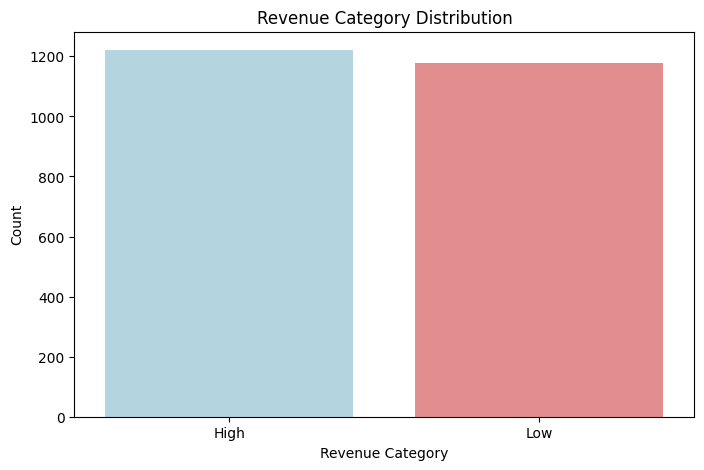

In [190]:
plt.figure(figsize=(8, 5))
sns.countplot(x="revenue_category", data=train_df, hue="revenue_category", palette=["lightblue", "lightcoral"], legend=False)
plt.title("Revenue Category Distribution")
plt.xlabel("Revenue Category")
plt.ylabel("Count")
plt.show()


The chart shows the number of movies in "High" and "Low" revenue categories. Both groups have similar counts, meaning the data is well balanced for model training.

####2 Impact of Ratings on Revenue

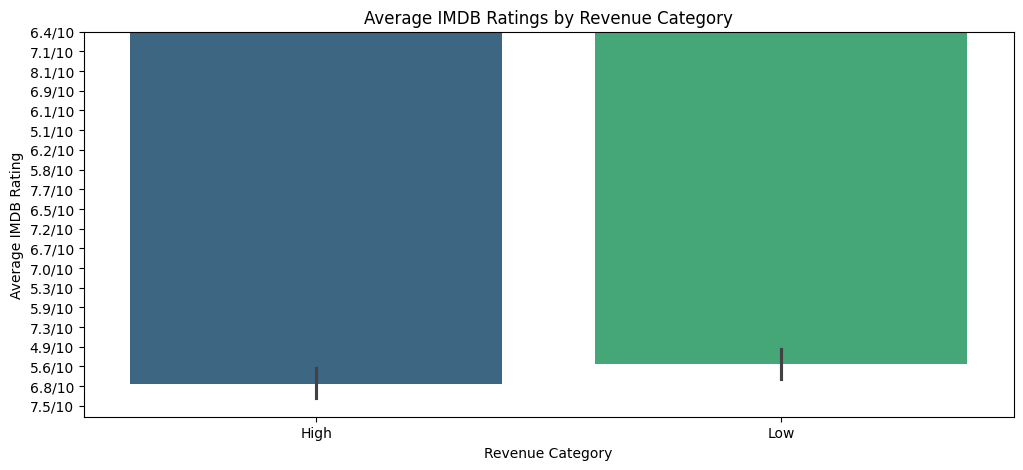

In [191]:
plt.figure(figsize=(12, 5))
sns.barplot(x="revenue_category", y="ratings_imdb", hue="revenue_category", data=train_df,
            palette="viridis", legend=False)
plt.title("Average IMDB Ratings by Revenue Category")
plt.ylabel("Average IMDB Rating")
plt.xlabel("Revenue Category")
plt.show()


The chart shows that high and low revenue movies have similar IMDb ratings. This means IMDb ratings may not strongly predict a movie's revenue.

####3 Movie Popularity (Views, Likes, Comments)

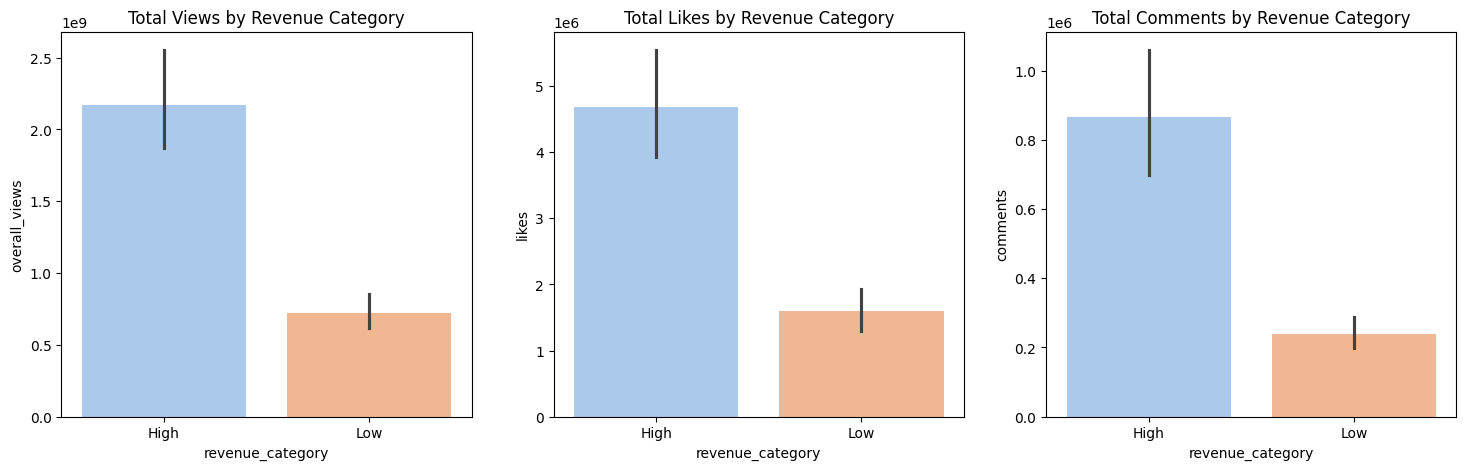

In [192]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x="revenue_category", y="overall_views", hue="revenue_category", data=train_df, ax=axes[0], palette="pastel", estimator=sum, legend=False)
axes[0].set_title("Total Views by Revenue Category")

sns.barplot(x="revenue_category", y="likes", hue="revenue_category", data=train_df, ax=axes[1], palette="pastel", estimator=sum, legend=False)
axes[1].set_title("Total Likes by Revenue Category")

sns.barplot(x="revenue_category", y="comments", hue="revenue_category", data=train_df, ax=axes[2], palette="pastel", estimator=sum, legend=False)
axes[2].set_title("Total Comments by Revenue Category")

plt.show()


Movies with higher revenue tend to have more views, likes, and comments compared to lower revenue movies. This suggests that audience engagement is higher for successful movies.

####4 Top 10 Genres vs Revenue Category

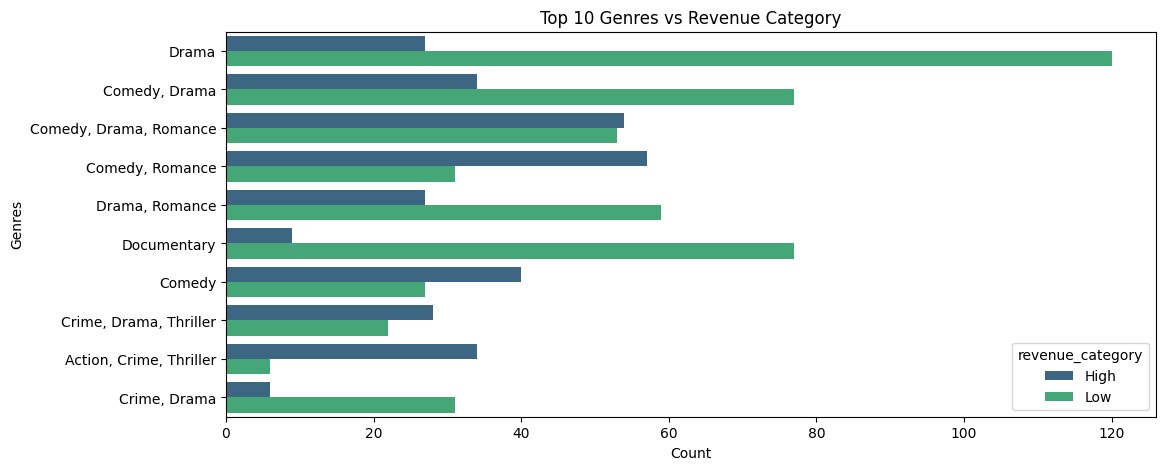

In [180]:
plt.figure(figsize=(12, 5))

# to get only the top 10 genres
top_10_genres = train_df["genres"].value_counts().index[:10]

sns.countplot(y="genres", hue="revenue_category", data=train_df, palette="viridis", order=top_10_genres)
plt.title("Top 10 Genres vs Revenue Category")
plt.xlabel("Count")
plt.ylabel("Genres")
plt.show()



The chart shows the top ten genre with the revenue category. Some genres, like Drama and Documentary, have more low revenue movies, while others, like Action and Crime, have more high revenue movies. Genre choice might influence a movie's revenue.

####5 Censor Rating vs Revenue Category

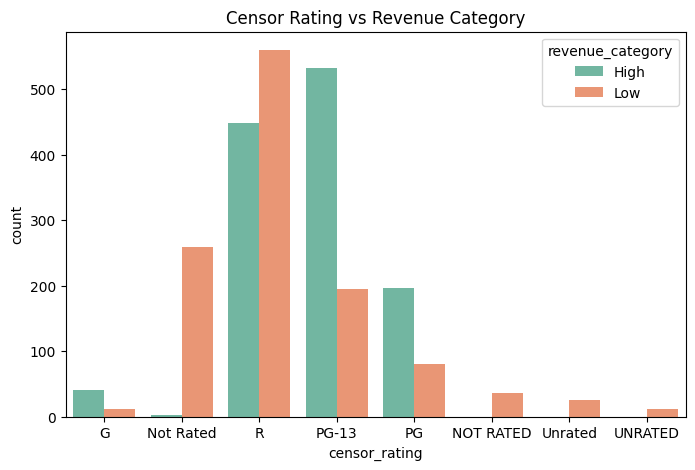

In [167]:
plt.figure(figsize=(8, 5))
sns.countplot(x="censor_rating", hue="revenue_category", data=train_df, palette="Set2")
plt.title("Censor Rating vs Revenue Category")
plt.show()


Movies with an "R" rating have the highest count in both high and low revenue categories. "PG-13" and "PG" movies also appear frequently, but fewer "G" or unrated movies generate high revenue.









####6 Top 10 Countries vs Revenue Category

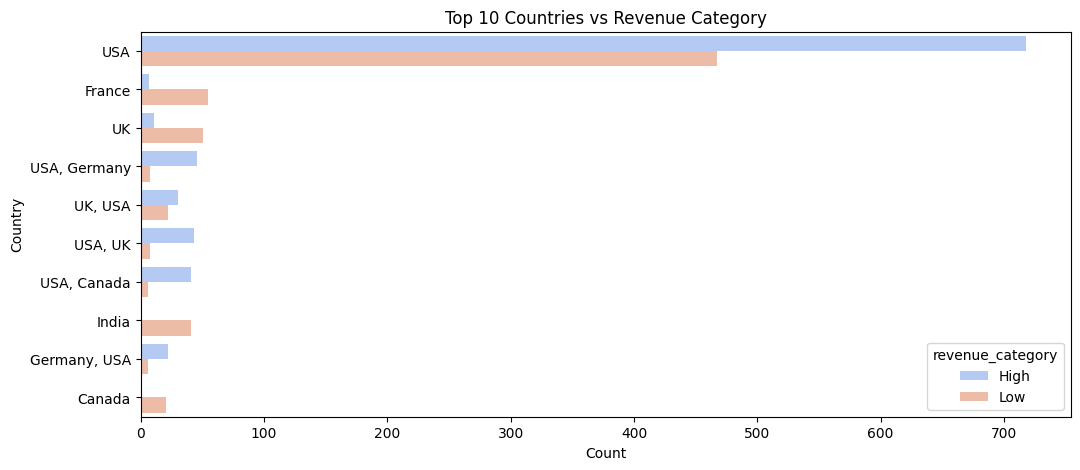

In [168]:
plt.figure(figsize=(12, 5))
top_10_countries = train_df["country"].value_counts().index[:10]
sns.countplot(y="country", hue="revenue_category", data=train_df, palette="coolwarm", order=top_10_countries)
plt.title("Top 10 Countries vs Revenue Category")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()


The USA produces the most movies, both high and low revenue. Other countries like France, the UK, and India contribute, but their numbers are much smaller.

####7 Average Awards Won by Revenue Category

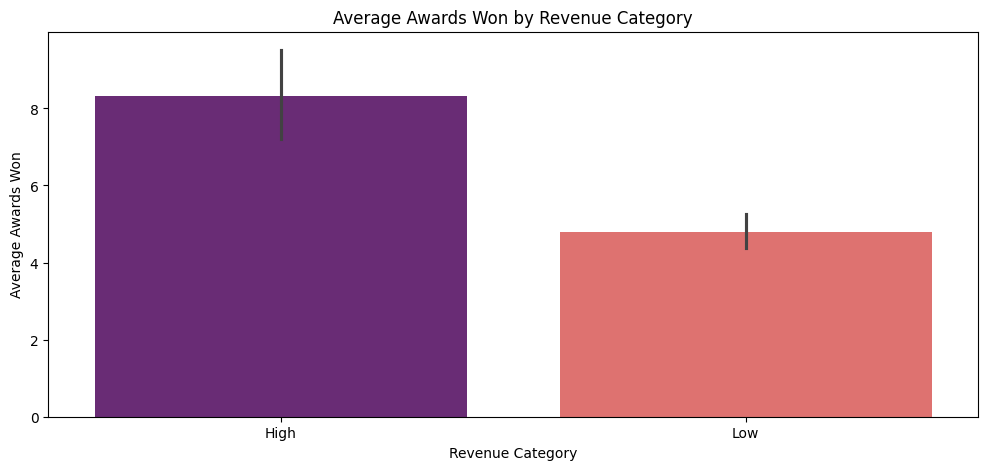

In [197]:
plt.figure(figsize=(12, 5))
sns.barplot(x="revenue_category", y="awards_win", data=train_df, hue="revenue_category", palette="magma", legend=False)
plt.title("Average Awards Won by Revenue Category")
plt.ylabel("Average Awards Won")
plt.xlabel("Revenue Category")
plt.show()



This chart shows that companies with high revenue tend to win more awards on average compared to companies with low revenue.

####8 Overall Views vs IMDB Ratings

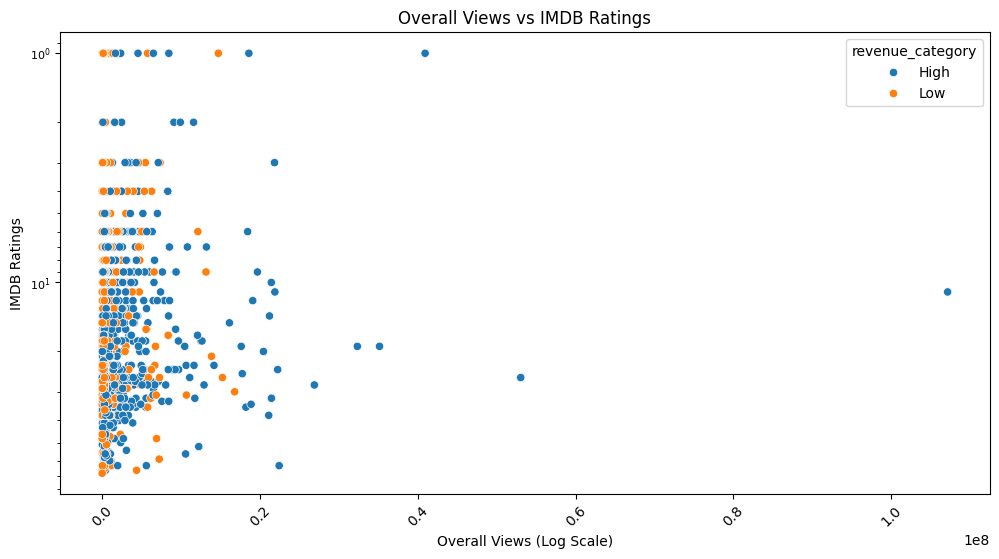

In [201]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="overall_views", y="ratings_imdb", hue="revenue_category", data=train_df)
# Apply log scale to y-axis
plt.yscale("log")
# Rotate x-axis labels
plt.xticks(rotation=45)
# Keep y-axis labels horizontal
plt.yticks(rotation=0)
# Reduce y-axis label font size
plt.tick_params(axis='y', labelsize=8)

plt.title("Overall Views vs IMDB Ratings")
plt.xlabel("Overall Views (Log Scale)")
plt.ylabel("IMDB Ratings")

plt.show()

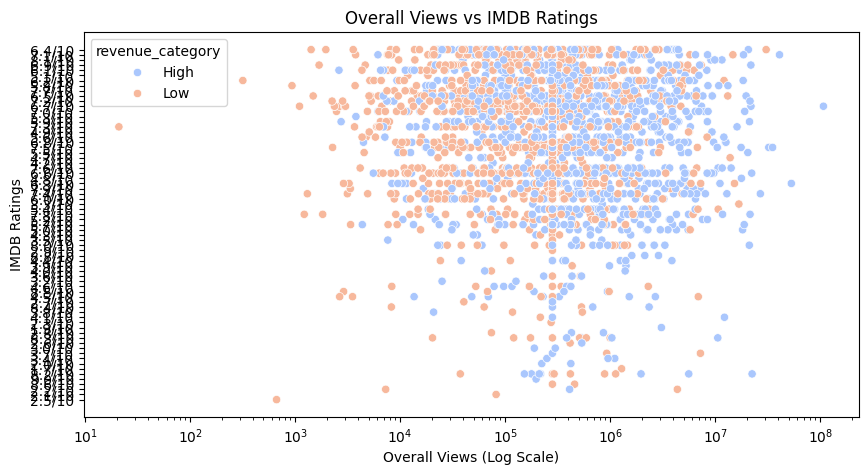

In [179]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="overall_views", y="ratings_imdb", hue="revenue_category", data=train_df, palette="coolwarm")
plt.xscale("log")
plt.title("Overall Views vs IMDB Ratings")
plt.xlabel("Overall Views (Log Scale)")
plt.ylabel("IMDB Ratings")
plt.show()


This chart shows the relationship between overall views and IMDB ratings. Movies with high revenue (blue) and low revenue (orange) are spread across different view counts and ratings. Higher view counts tend to have more high revenue movies.

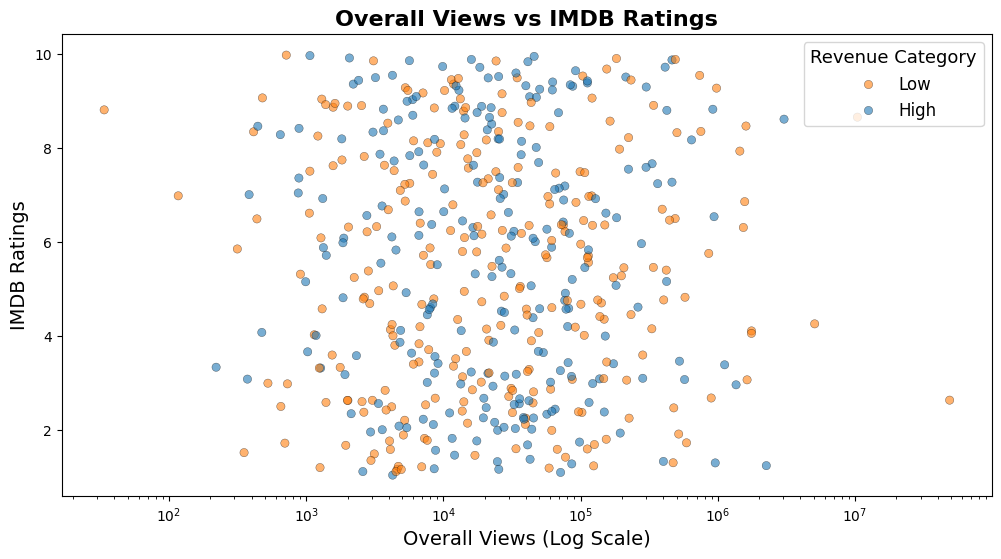

In [202]:
# Sample Data (Replace this with your actual dataset)
np.random.seed(42)
data = pd.DataFrame({
    # Simulating log-distributed views
    'Overall_Views': np.random.lognormal(mean=10, sigma=2, size=500),
     # Random ratings between 1 and 10
    'IMDB_Ratings': np.random.uniform(1, 10, 500),
    # Randomly assign High or Low revenue
    'revenue_category': np.random.choice(['High', 'Low'], size=500)
})

# Convert revenue category into colors
# Blue for High, Orange for Low
palette = {'High': '#1f77b4', 'Low': '#ff7f0e'}

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=data['Overall_Views'],
    y=data['IMDB_Ratings'],
    hue=data['revenue_category'],
    palette=palette,
    # Adjust transparency to reduce overlap
    alpha=0.6,
    edgecolor='black',
    linewidth=0.3
)

# Set logarithmic scale for better visualization
plt.xscale('log')

# Improve labels and title
plt.xlabel("Overall Views (Log Scale)", fontsize=14)
plt.ylabel("IMDB Ratings", fontsize=14)
plt.title("Overall Views vs IMDB Ratings", fontsize=16, fontweight='bold')

# Improve legend visibility
plt.legend(title="Revenue Category", fontsize=12, title_fontsize=13, loc='upper right')

# Show the plot
plt.show()


This scatter plot shows the relationship between Overall Views and IMDB Ratings of movies.

The x axis (log scale) represents Overall Views (how many times a movie was watched).

The y axis represents IMDB Ratings (how well the movie was rated).

The colors show the Revenue Category:

Blue dots = High revenue

Orange dots = Low revenue

There is no clear pattern between views and ratings, meaning highly watched movies don’t always have high ratings.

####9 Select only numerical features for correlation analysis

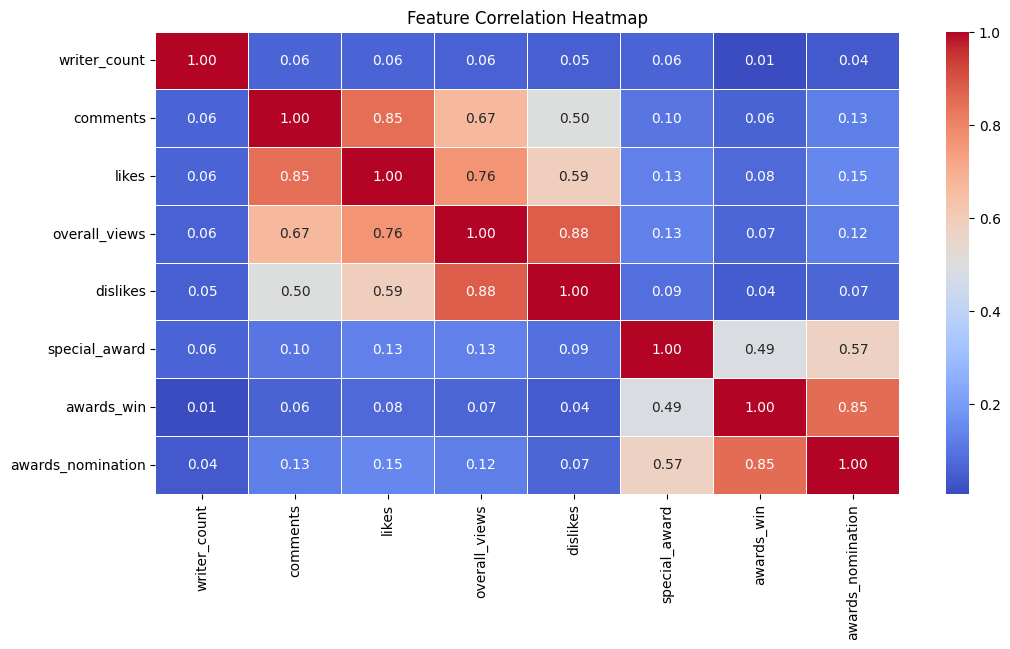

In [163]:
numerical_features = train_df.select_dtypes(include=np.number)
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_features.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

This heatmap shows the relationships between different features. Darker red colors mean a strong positive correlation, while darker blue means a weak or negative correlation. For example, "likes" and "comments" have a strong connection, meaning more comments usually come with more likes. Similarly, "awards_win" and "awards_nomination" are strongly related.

#4. Model Building
The goal is to predict revenue_category (Low/High).

####4.1 Data Preparation for Model
Split train.csv into training and validation sets

Apply encoding for categorical variables.

Standardize or normalize numerical features.

####4.2 Model Selection
different models:

####Baseline Model: Logistic Regression
Tree Based Models: Random Forest

####4.3 Model Evaluation
Accuracy as the primary metric.

Precision, Recall, and F1 score for better evaluation.

Plotting of a confusion matrix to see misclassifications.


####4.1: Prepare Data for Training

In [185]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Define categorical and numerical features
categorical_features = ["country", "genres", "language", "censor_rating", "title_adaption"]
numerical_features = train_df.select_dtypes(include=np.number).columns.tolist()
numerical_features = [f for f in numerical_features if f not in ["revenue_category"]]

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),
    ])

# Apply preprocessing and then split the data
X = train_df.drop(["title", "revenue_category"], axis=1)
y = train_df["revenue_category"]

# Preprocess before splitting
X = preprocessor.fit_transform(X)

# splitting of the data and train the model
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Validate model
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

Validation Accuracy: 0.8104166666666667


In [187]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="liblinear"),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and Evaluate Each Model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Evaluate performance
    print("Validation Accuracy:", accuracy_score(y_val, y_pred))


Validation Accuracy: 0.51875
Validation Accuracy: 0.8104166666666667


In [188]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and Evaluate Each Model
for name, model in models.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Evaluate performance
    print("Validation Accuracy:", accuracy_score(y_val, y_pred))



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Accuracy: 0.6583333333333333
Validation Accuracy: 0.8104166666666667


## 4.3: Evaluate Model Performance

              precision    recall  f1-score   support

        High       0.79      0.85      0.82       243
         Low       0.83      0.77      0.80       237

    accuracy                           0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480



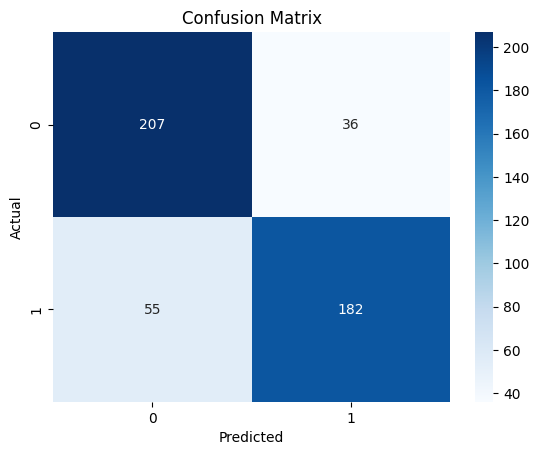

In [189]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print(classification_report(y_val, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


This confusion matrix evaluates the performance of a classification model by comparing actual values with predicted values.

207 cases were correctly predicted as 0 (true negatives).

182 cases were correctly predicted as 1 (true positives).

36 cases were mistakenly classified as 1 instead of 0 (false positives).

55 cases were mistakenly classified as 0 instead of 1 (false negatives).

The darker the color, the higher the number of predictions in that category. Ideally, a good model has high values along the diagonal (correct predictions) and low values elsewhere (errors).

#5.Predictions and Submission

Applying the trained model on test.csv.

Generating predictions for revenue_category.

Then Save the results in submissions.csv with two columns: title and revenue_category.


In [175]:
# Predict revenue category
# Preprocess the test data in the same way as the training data
X_test = preprocessor.transform(test_df.drop(["title"], axis=1))
test_df["revenue_category"] = model.predict(X_test)

# Save predictions
submission = test_df[["title", "revenue_category"]]
submission.to_csv("submission.csv", index=False)

print("Submission file saved!")

Submission file saved!


In [176]:
# Load the submission file
submission = pd.read_csv("submission.csv")

# Display first few rows
print(submission.head())


                           title revenue_category
0                       Delhi-6               Low
1            Before I Disappear               Low
2                  Good Year, A              High
3                         Brüno              High
4  How to Lose a Guy in 10 Days              High
